### Imports

In [1]:
include("../Commandline.jl")
include("../Params.jl")
include("../Solution.jl")
include("../LocalSearch.jl")
include("../GeneticAlgorithm.jl")
include("../PlotResults.jl");

In [2]:
instance_name = "tai150b.dat"
# Simulate commandline arguments
args = Dict(
    "cpu_time" => 120, "seed" => 0, 
    "instance_path" => "..\\..\\instances\\$instance_name", 
    "sol" => "..\\..\\outputs\\sol-$instance_name"
)
c = Commandline(true, args["cpu_time"], args["seed"], args["instance_path"], args["sol"])

params = Params(c.instance_path, c.output_path, c.seed, c.cpu_time)

seed = 10

10

## Compare basic methods

#### Multistart LS - Swap neighborhood

In [3]:
solLS, resLS = multistartLS(params, 100)
println("Multistart LS solution:")
printSolution(solLS)
println()

Multistart LS solution:
Permutation=[40, 14, 36, 2, 72, 9, 135, 33, 87, 131, 99, 146, 117, 83, 24, 74, 71, 145, 54, 57, 86, 3, 41, 59, 50, 17, 114, 23, 140, 109, 11, 1, 137, 89, 70, 102, 39, 15, 5, 147, 16, 62, 133, 100, 75, 92, 144, 43, 76, 67, 118, 22, 91, 110, 142, 73, 18, 108, 27, 149, 26, 116, 52, 61, 93, 82, 123, 58, 42, 47, 101, 51, 56, 115, 105, 126, 19, 120, 112, 80, 98, 107, 49, 37, 65, 119, 88, 35, 28, 129, 139, 31, 138, 63, 21, 84, 13, 45, 4, 55, 81, 29, 38, 85, 10, 60, 127, 90, 12, 77, 95, 30, 66, 136, 111, 79, 96, 113, 6, 103, 148, 69, 53, 128, 125, 132, 78, 8, 46, 64, 68, 124, 130, 44, 34, 94, 121, 32, 150, 143, 104, 25, 106, 134, 97, 20, 7, 141, 48, 122]
Cost=516997841



In [4]:
resLS

Dict{String,Any} with 5 entries:
  "time"        => 258.975
  "gap"         => 0.0362825
  "finalCost"   => 516997841
  "numTrials"   => 1
  "permutation" => [40, 14, 36, 2, 72, 9, 135, 33, 87, 131  …  104, 25, 106, 13…

#### Multistart LS - Cyclic neighborhood

In [5]:
solLS, resLS = multistartLS(params, 50000, localSearchFunc=cyclicHeuristic)
println("Multistart cyclic LS solution:")
printSolution(solLS)
println()

Multistart cyclic LS solution:
Permutation=[50, 34, 46, 29, 85, 115, 149, 75, 133, 17, 80, 74, 11, 117, 124, 73, 112, 8, 3, 145, 98, 127, 94, 18, 107, 78, 105, 55, 27, 14, 37, 76, 7, 16, 150, 60, 120, 71, 122, 138, 32, 52, 31, 54, 92, 130, 70, 28, 33, 56, 148, 91, 53, 119, 88, 108, 143, 90, 10, 123, 125, 38, 132, 77, 20, 113, 47, 63, 101, 81, 111, 82, 42, 95, 109, 129, 96, 135, 140, 57, 141, 44, 65, 22, 36, 59, 99, 30, 142, 102, 87, 106, 21, 24, 51, 35, 61, 136, 40, 23, 103, 116, 12, 43, 72, 68, 69, 2, 4, 93, 26, 84, 39, 104, 5, 126, 48, 58, 15, 1, 66, 19, 97, 89, 110, 9, 62, 13, 131, 49, 83, 114, 139, 45, 86, 128, 41, 79, 6, 118, 100, 25, 137, 144, 147, 67, 146, 121, 64, 134]
Cost=621016822



In [6]:
resLS

Dict{String,Any} with 5 entries:
  "time"        => 120.003
  "gap"         => 0.244781
  "finalCost"   => 621016822
  "numTrials"   => 7671
  "permutation" => [50, 34, 46, 29, 85, 115, 149, 75, 133, 17  …  100, 25, 137,…

## GA - Case study analysis

### Compare different recombination methods

In [31]:
sz = 50
gen = 400
mutate=cyclicHeuristic
selection=fitnessSelection
selectionOpts=Dict{String,Any}()#"fitnessThreshold"=>0.45)

Random.seed!(seed)
bestSol, resLS = multistartLS(params,gen)
println("Multistart Local Search solution:")
printSolution(bestSol)
println()


Random.seed!(seed)
solGA, res = runGA(params, gen, sz, recombineOp=order1cx,
                   selectionOp=selection, selectionOpts=selectionOpts,
                   mutate=mutate)
println("GA solution:")
printSolution(solGA)
println()


Random.seed!(seed)
solGA, res2 = runGA(params, gen, sz, recombineOp=PMXcx,
                   selectionOp=selection, selectionOpts=selectionOpts,
                   mutate=mutate)
println("GA solution:")
printSolution(solGA)
println()


Random.seed!(seed)
solGA, res3 = runGA(params, gen, sz, recombineOp=cyclecx,
                   selectionOp=selection, selectionOpts=selectionOpts,
                   mutate=mutate)
println("GA solution:")
printSolution(solGA)
println()


Multistart Local Search solution:
Permutation=[45, 50, 20, 134, 83, 65, 99, 97, 26, 13, 57, 149, 28, 48, 119, 72, 49, 25, 8, 67, 56, 69, 138, 145, 118, 19, 112, 150, 29, 31, 4, 125, 122, 27, 95, 55, 136, 108, 58, 132, 60, 107, 105, 128, 46, 126, 146, 130, 110, 94, 142, 38, 123, 124, 91, 76, 85, 80, 81, 53, 43, 75, 79, 52, 148, 68, 116, 30, 115, 88, 93, 54, 133, 51, 82, 63, 147, 106, 64, 61, 32, 12, 17, 22, 140, 59, 40, 41, 47, 129, 113, 141, 143, 78, 144, 121, 6, 139, 35, 100, 23, 44, 104, 1, 114, 96, 90, 77, 92, 127, 109, 71, 101, 5, 103, 39, 66, 3, 9, 16, 21, 89, 84, 34, 37, 102, 117, 11, 42, 24, 2, 70, 10, 98, 15, 111, 74, 62, 14, 18, 73, 86, 131, 7, 135, 137, 87, 36, 33, 120]
Cost=519544959

GA solution:
Permutation=[109, 26, 147, 83, 51, 99, 30, 15, 78, 133, 115, 111, 132, 143, 63, 104, 59, 67, 62, 98, 45, 113, 114, 46, 43, 116, 52, 53, 130, 48, 44, 148, 124, 125, 96, 69, 76, 106, 140, 9, 13, 120, 146, 68, 23, 10, 108, 105, 101, 94, 2, 6, 18, 92, 103, 145, 91, 4, 90, 20, 79, 127, 

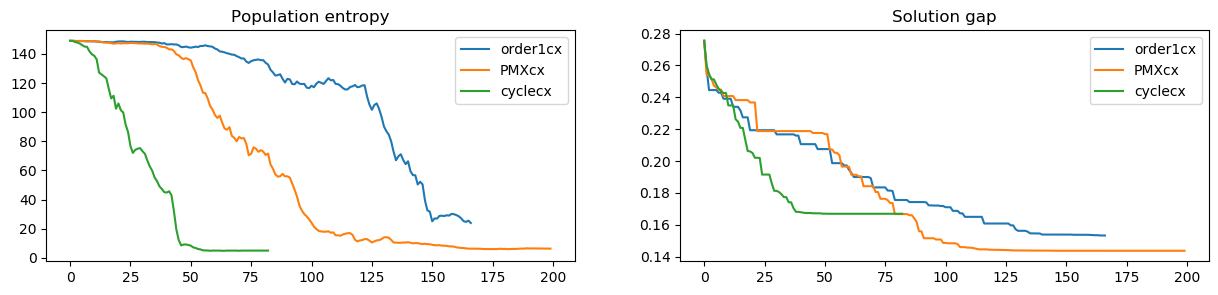

In [32]:
figure(figsize=(15,3))
subplot(121)
title("Population entropy")
plot(0:length(res["entropy"])-1, res["entropy"], label="order1cx")
plot(res2["entropy"], label="PMXcx")
plot(res3["entropy"], label="cyclecx")
#plot(res4["entropy"], label="res4")
#plot(res5["entropy"], label="res5")
legend()
subplot(122)
title("Solution gap")
plot(0:length(res["gap"])-1, res["gap"], label="order1cx")
plot(res2["gap"], label="PMXcx")
plot(res3["gap"], label="cyclecx")
#plot(res4["gap"], label="res4")
#plot(res5["cost"], label="res5")
legend();

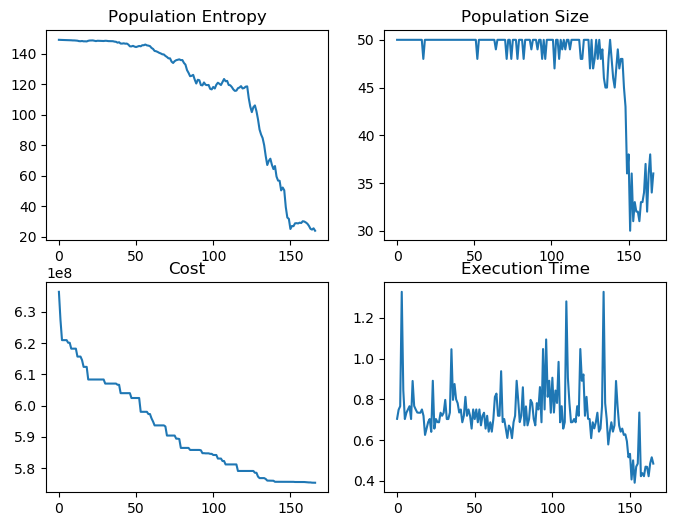

In [33]:
plotResults(res);

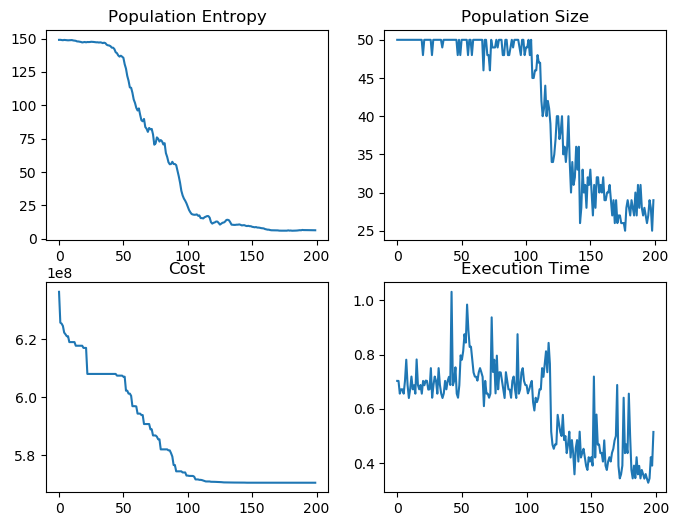

In [34]:
plotResults(res2);

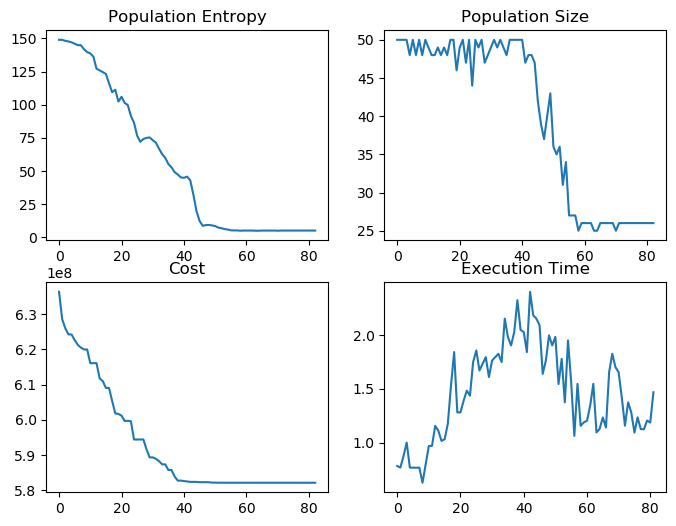

In [35]:
plotResults(res3);

## Survivors Analysis

#### Generate population

In [36]:
populationSize = 50

# Initialize population with random candidate solutions
population = initializePopulation(params,populationSize);

In [37]:
for (k,p) in enumerate(population[1:3])
    println("Soln $k: ",p.permutation) 
end

Soln 1: [50, 69, 66, 97, 141, 111, 26, 2, 143, 146, 133, 118, 139, 85, 104, 11, 72, 81, 27, 110, 22, 73, 89, 94, 12, 84, 64, 144, 70, 61, 127, 92, 106, 5, 101, 19, 99, 8, 33, 63, 117, 78, 112, 40, 88, 113, 122, 135, 134, 129, 109, 53, 119, 16, 147, 17, 120, 14, 10, 36, 74, 39, 121, 149, 60, 136, 123, 87, 13, 148, 25, 95, 115, 6, 38, 49, 80, 86, 68, 107, 24, 58, 137, 35, 138, 30, 102, 116, 4, 43, 47, 45, 57, 48, 62, 20, 34, 77, 52, 108, 46, 23, 128, 103, 91, 79, 37, 98, 65, 21, 29, 76, 15, 105, 54, 71, 31, 67, 7, 9, 28, 140, 90, 83, 93, 96, 18, 55, 114, 59, 145, 44, 125, 75, 32, 126, 42, 150, 56, 82, 130, 1, 132, 51, 3, 131, 100, 41, 124, 142]
Soln 2: [7, 109, 143, 149, 28, 144, 102, 36, 59, 24, 60, 34, 67, 31, 40, 76, 110, 142, 131, 141, 95, 48, 9, 96, 114, 11, 53, 37, 94, 14, 147, 71, 5, 70, 26, 17, 112, 68, 73, 44, 108, 6, 46, 62, 3, 50, 123, 13, 41, 93, 84, 130, 57, 113, 139, 27, 125, 138, 146, 66, 35, 85, 83, 74, 97, 10, 132, 29, 33, 91, 120, 135, 80, 100, 148, 90, 38, 119, 19, 122

#### Generate offspring

In [38]:
recombineOp=cyclecx

# Select parents
population = shuffle!(population);
parents = [(population[i], population[i+Int(floor(length(population)/2))]) 
                   for i=1:Int(floor(length(population)/2))]
# Recombine pairs of solutions
offspring = recombinationOp(parents, recombineOp)

# No mutation
population = vcat(population,offspring);

In [39]:
entropy(population, hamming, mean)

147.51757575757577

In [40]:
length(population)

100

#### Calculate Fitness and Diversity of individuals

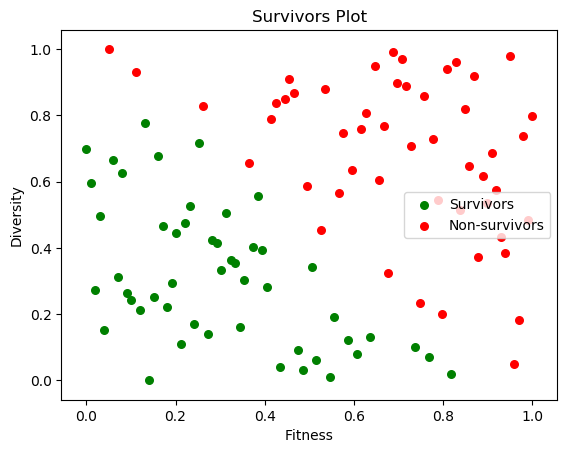

In [41]:
selectionOpts = Dict{String,Any}("fitnessThreshold"=>0.15, "n"=>populationSize, "distanceFunc"=>hamming)
survivors = biasedFitnessSelection(population, selectionOpts);

plotSurvivors(population, survivors);

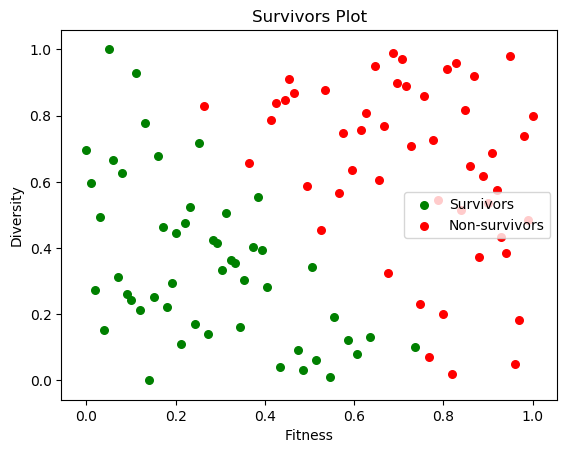

In [42]:
selectionOpts = Dict{String,Any}("fitnessThreshold"=>0.3, "n"=>populationSize, "distanceFunc"=>hamming)
survivors = biasedFitnessSelection(population, selectionOpts);

plotSurvivors(population, survivors);

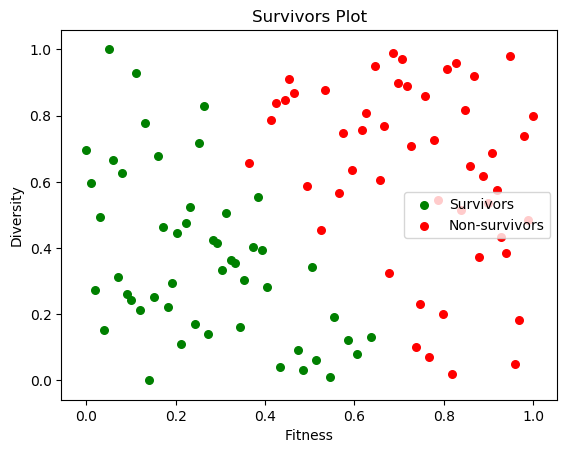

In [43]:
selectionOpts = Dict{String,Any}("fitnessThreshold"=>0.45, "n"=>populationSize, "distanceFunc"=>hamming)
survivors = biasedFitnessSelection(population, selectionOpts);

plotSurvivors(population, survivors);

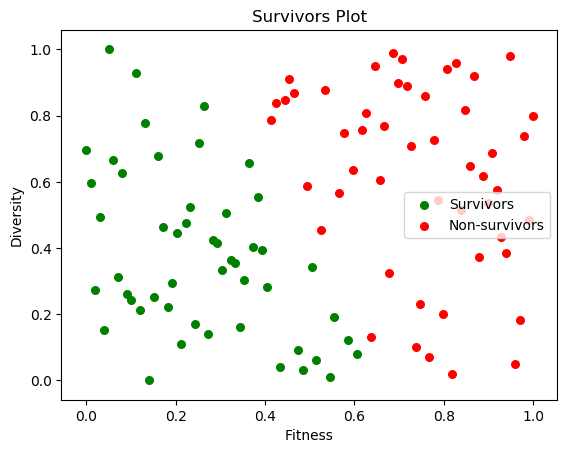

In [44]:
selectionOpts = Dict{String,Any}("fitnessThreshold"=>0.5, "n"=>populationSize, "distanceFunc"=>hamming)
survivors = biasedFitnessSelection(population, selectionOpts);

plotSurvivors(population, survivors);

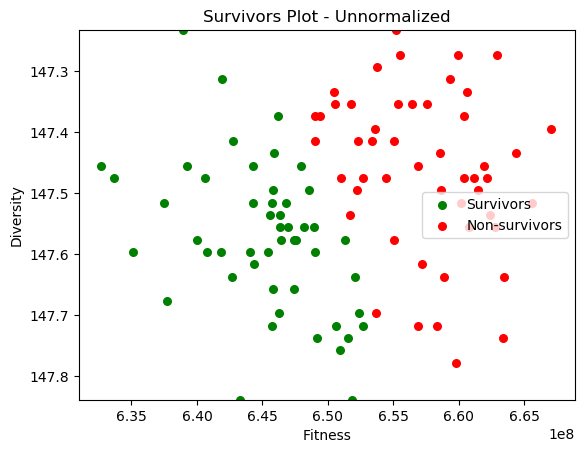

In [45]:
divContrib = [diversityContrib(s1, population, hamming) for s1 in population]
fitness = [s1.cost for s1 in population]
plotSurvivorsUnnorm(fitness, divContrib, survivors);

### Compare different Selection strategies

In [48]:
sz = 50
gen = 200
recombine=cyclecx
mutate=cyclicHeuristic

Random.seed!(seed)
solGA, res = runGA(params, gen, sz, recombineOp=recombine,
                   selectionOp=fitnessSelection,
                   mutate=mutate)
println("GA solution:")
printSolution(solGA)
println()

Random.seed!(seed)
solGA, res2 = runGA(params, gen, sz, recombineOp=recombine,
                   #selectionOp=fitnessSelection)
                   selectionOp=biasedFitnessSelection, 
                   selectionOpts=Dict{String,Any}("fitnessThreshold"=>0.15),
                   mutate=mutate)
println("GA solution:")
printSolution(solGA)
println()

Random.seed!(seed)
solGA, res3 = runGA(params, gen, sz, recombineOp=recombine,
                   #selectionOp=fitnessSelection)
                   selectionOp=biasedFitnessSelection, 
                   selectionOpts=Dict{String,Any}("fitnessThreshold"=>0.3),
                   mutate=mutate)
println("GA solution:")
printSolution(solGA)
println()

Random.seed!(seed)
solGA, res4 = runGA(params, gen, sz, recombineOp=recombine,
                   #selectionOp=fitnessSelection)
                   selectionOp=biasedFitnessSelection, 
                   selectionOpts=Dict{String,Any}("fitnessThreshold"=>0.45),
                   mutate=mutate)
println("GA solution:")
printSolution(solGA)
println()

GA solution:
Permutation=[19, 55, 105, 138, 145, 150, 135, 71, 23, 59, 24, 88, 43, 65, 133, 132, 31, 78, 86, 134, 61, 130, 18, 98, 53, 14, 146, 1, 21, 64, 126, 49, 17, 50, 102, 8, 120, 94, 80, 60, 13, 33, 121, 84, 16, 41, 52, 67, 140, 75, 119, 77, 35, 129, 38, 37, 27, 93, 99, 87, 109, 117, 40, 95, 44, 36, 29, 20, 92, 144, 70, 131, 34, 141, 108, 48, 124, 104, 111, 28, 3, 79, 89, 81, 90, 25, 123, 116, 101, 2, 69, 9, 110, 22, 148, 26, 125, 100, 68, 57, 85, 136, 112, 139, 83, 74, 91, 122, 137, 149, 15, 54, 128, 46, 39, 5, 12, 82, 72, 56, 4, 62, 107, 63, 30, 32, 103, 73, 47, 143, 113, 42, 142, 96, 51, 7, 76, 66, 11, 10, 58, 45, 115, 106, 127, 118, 114, 97, 6, 147]
Cost=582145252

GA solution:
Permutation=[62, 117, 12, 97, 37, 95, 150, 145, 50, 127, 103, 72, 57, 8, 24, 141, 102, 39, 79, 105, 19, 139, 75, 129, 104, 60, 36, 136, 33, 146, 40, 2, 31, 46, 106, 82, 74, 10, 109, 66, 68, 110, 80, 22, 121, 100, 53, 1, 21, 14, 112, 23, 13, 28, 26, 4, 101, 70, 149, 90, 99, 17, 65, 47, 73, 86, 113, 63, 

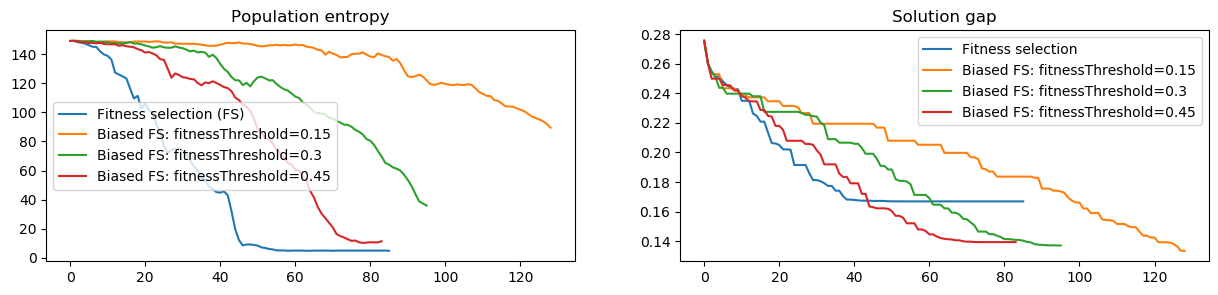

In [56]:
figure(figsize=(15,3))
subplot(121)
title("Population entropy")
plot(0:length(res["entropy"])-1, res["entropy"], label="Fitness selection (FS)")
plot(res2["entropy"], label="Biased FS: fitnessThreshold=0.15")
plot(res3["entropy"], label="Biased FS: fitnessThreshold=0.3")
plot(res4["entropy"], label="Biased FS: fitnessThreshold=0.45")
#plot(res5["entropy"], label="res5")
legend()
subplot(122)
title("Solution gap")
plot(0:length(res["gap"])-1, res["gap"], label="Fitness selection")
plot(res2["gap"], label="Biased FS: fitnessThreshold=0.15")
plot(res3["gap"], label="Biased FS: fitnessThreshold=0.3")
plot(res4["gap"], label="Biased FS: fitnessThreshold=0.45")
#plot(res5["cost"], label="res5")
legend();

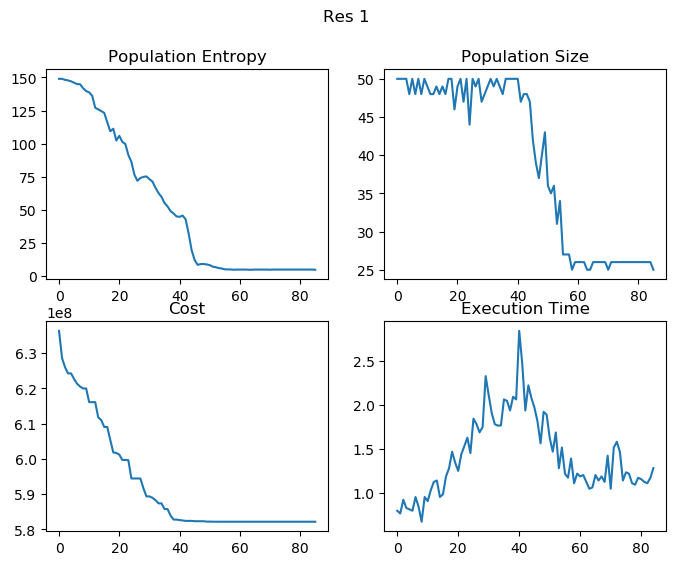

In [50]:
plotResults(res)
suptitle("Res 1");

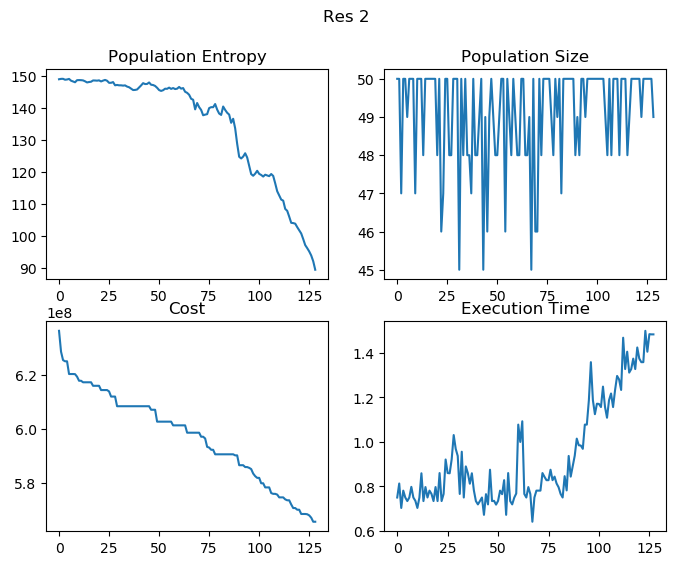

In [51]:
plotResults(res2)
suptitle("Res 2");

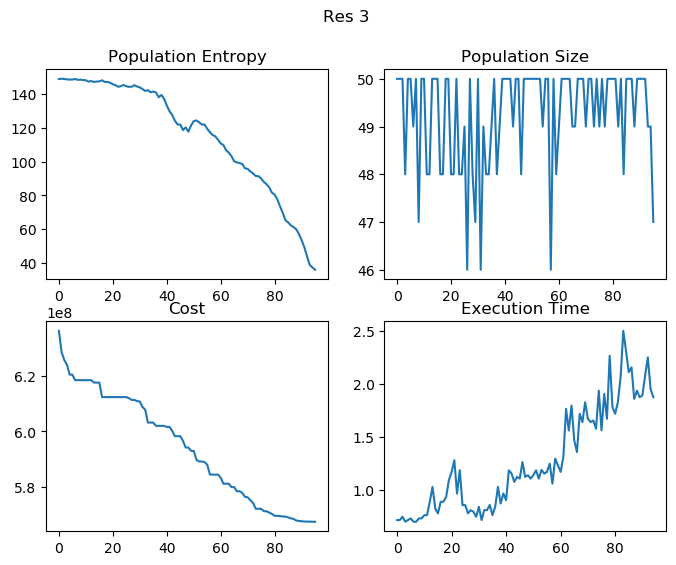

In [52]:
plotResults(res3)
suptitle("Res 3");

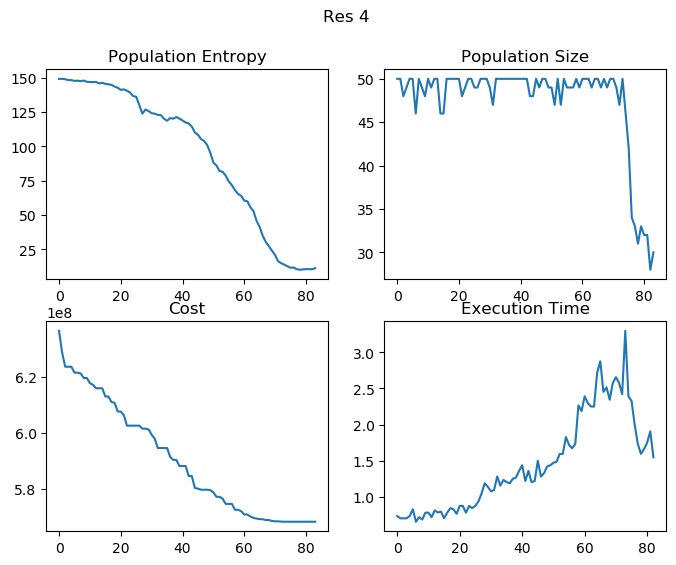

In [53]:
plotResults(res4)
suptitle("Res 4");

# Rascunhos

## Algorithm analysis

Random.seed!(0)

recombineOp=cyclecx
distanceFunc=hamming
entropyReduceFunc=mean
#selectionOp=fitnessSelection
#selectionArgs=Dict("n"=>populationSize)
selectionOp=biasedFitnessSelection
selectionArgs=Dict("distanceFunc"=>hamming, "fitnessThreshold"=>0.1)
mutate = false

maxGenerations = 5
generation = 0


startTime = time()
# Check if population size is an even number
if populationSize % 2 != 0
    populationSize += 1
end
results = Dict{String,Any}()
results["maxGenerations"] = maxGenerations
results["populationSize"] = populationSize
results["entropy"] = []
results["numIndividuals"] = []
results["cost"] = []
results["generationTime"] = []

# Initialize population with random candidate solutions
population = initializePopulation(params, populationSize)
bestSol = sort(population)[1]

append!(results["numIndividuals"],length(population))
append!(results["entropy"],entropy(population, distanceFunc, entropyReduceFunc))
append!(results["cost"],bestSol.cost)
append!(results["generationTime"],time() - startTime)

generation = 0
# Repeat until Termination condition is satisfied
while ((generation < maxGenerations) && (time() - startTime < params.maxTime))
    println("population size: ",length(population))
    # Select parents
    parents = [(population[i], population[i+Int(floor(length(population)/2))]) 
               for i=1:Int(floor(length(population)/2))]

    # Recombine pairs of solutions
    offspring = recombinationOp(parents, recombineOp)

    # Mutate the resulting offspring
    if mutate != false
        offspring = mutationOp(offspring, mutate)
    end

    # Evaluate new candidates
    # TODO

    # Select individuals for the next generation
    population = vcat(population,offspring)
    println("population size with offspring: ",length(population))
    population = removeClones(population) # Remove clones from the population
    println("population size after removing clones: ",length(population))
    survivors = selectionOp(population, selectionArgs)
    #plotSurvivors(population, survivors)
    population = population[survivors]
    println("population size after selection: ",length(population))
    
    
    sol = sort(population)[1]
    # record best observed solution
    if sol < bestSol
        bestSol = sol
    end

    append!(results["numIndividuals"],length(population))
    append!(results["entropy"],entropy(population, distanceFunc, entropyReduceFunc))
    append!(results["cost"],bestSol.cost)
    append!(results["generationTime"],time() - startTime)
    results["generations"] = generation
    generation += 1
end
results["time"] = time() - startTime
results["finalCost"] = bestSol.cost
results["permutation"] = bestSol.permutation
if isnan(params.solutionCost)
    results["gap"] = NaN
else
    results["gap"] = (bestSol.cost - params.solutionCost) / params.solutionCost
end
